In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import iqr
import matplotlib.patches as mpatches

In [2]:
# Load heart data set into pandas
heart_df = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
#Check for empty spots
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


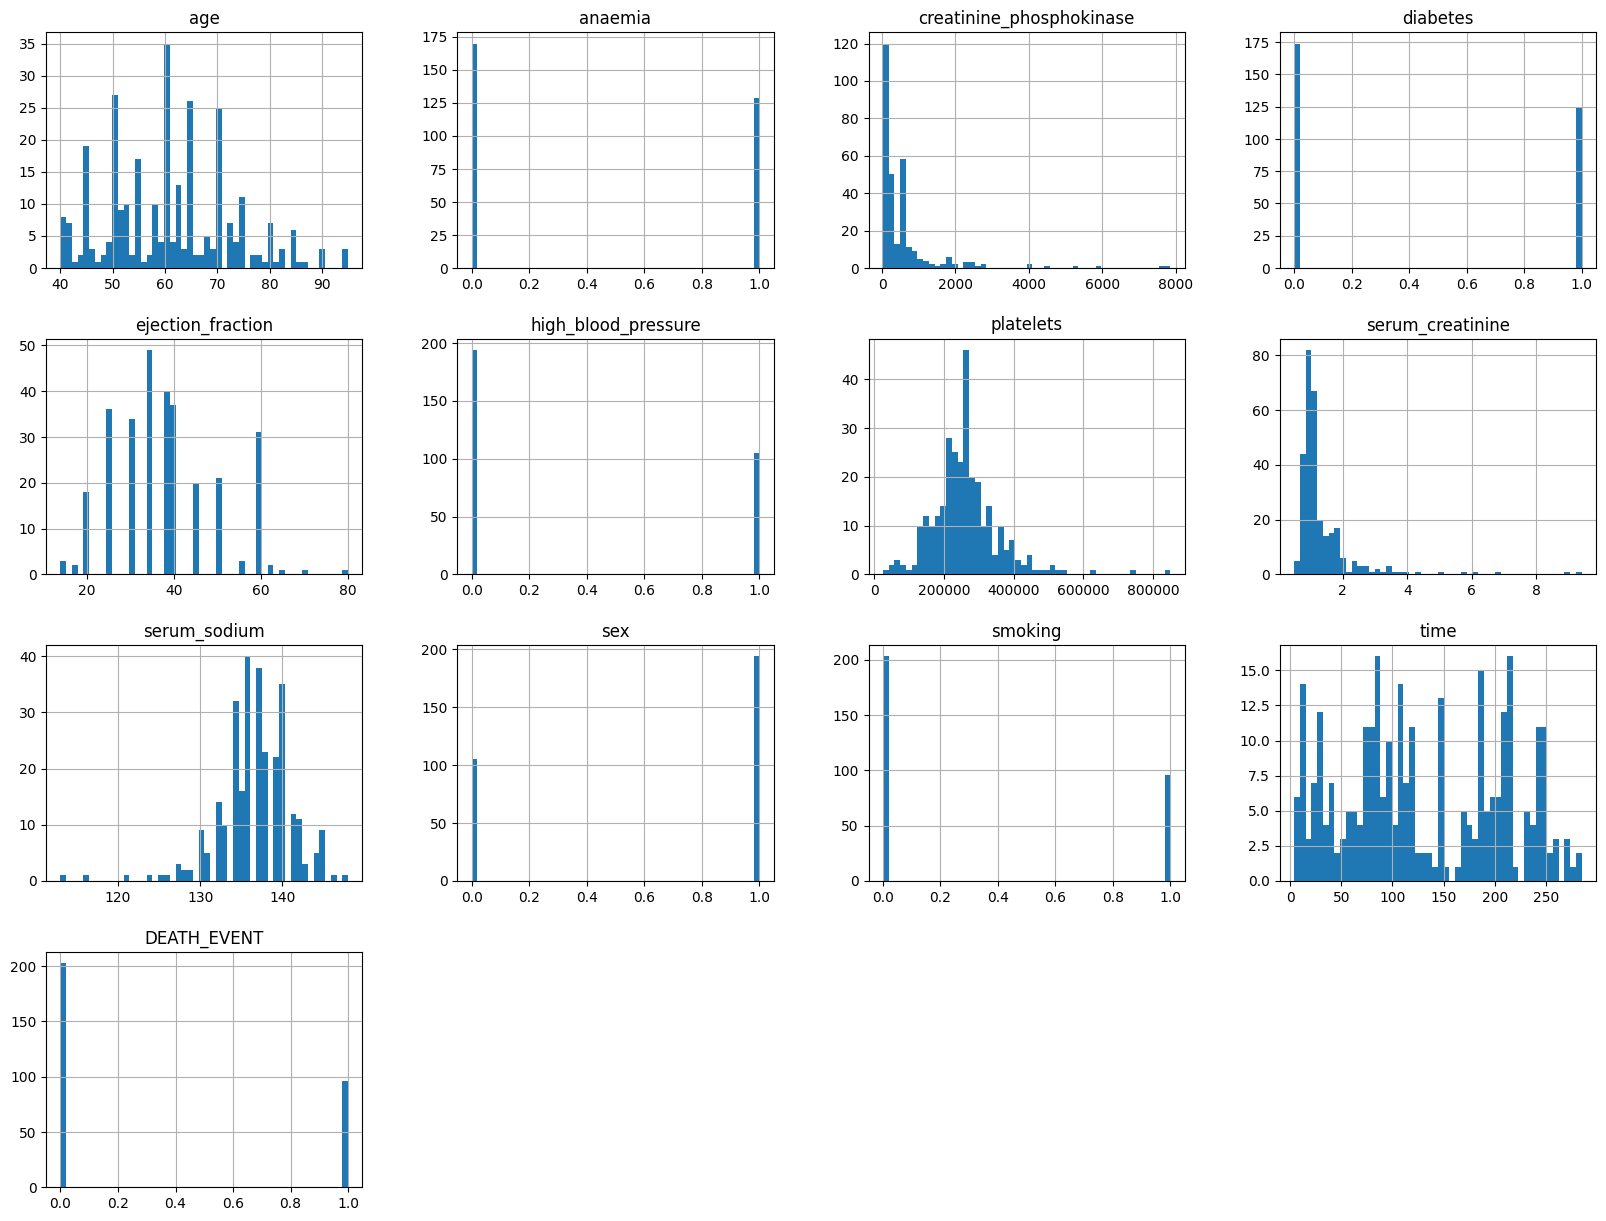

In [4]:
heart_df.hist(bins=50, figsize=(20,15))
plt.show()

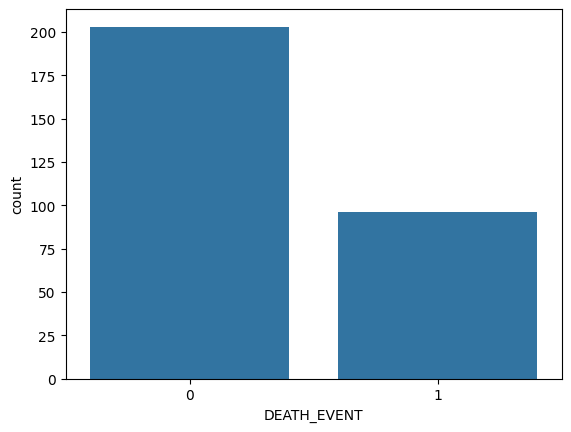

In [5]:
#"Death_Event" represents if the patient died during the follow up period.
#0 = living | 1 = deceased

death = heart_df['DEATH_EVENT']
sns.countplot(x=death)
plt.show()

/var/folders/hd/p5_45krj19z5mg2jsb55zjcr0000gn/T/ipykernel_5206/1049847329.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female', 'Male'])


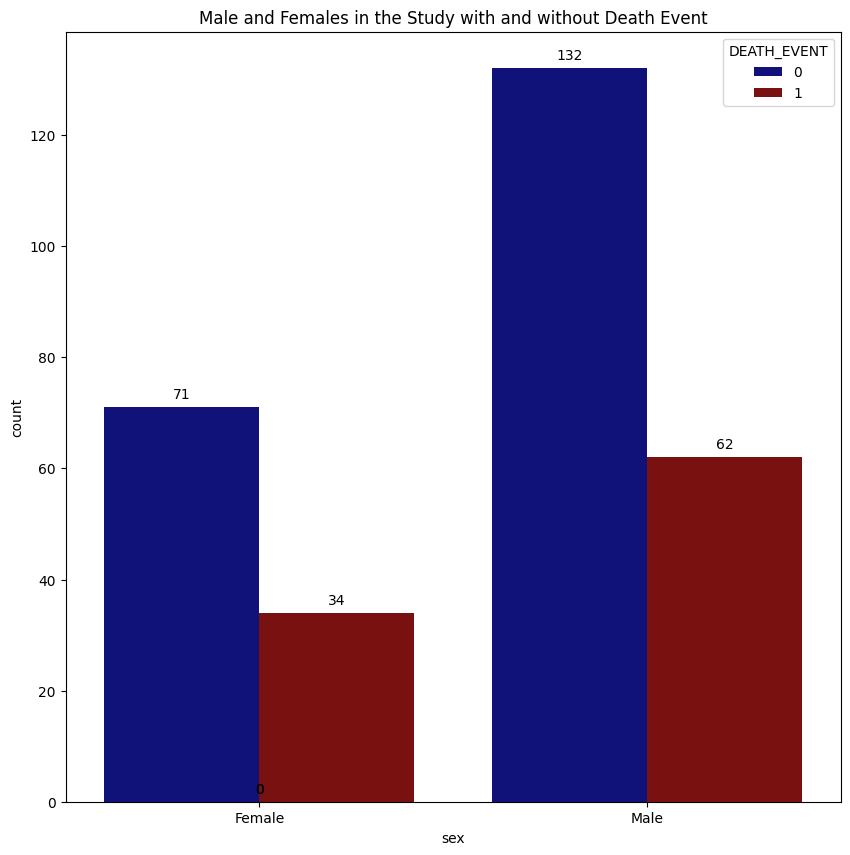

The percentage of female patients is 35.12%
The percentage of deaths that were female is 35.42%
The percentage of male patients is 64.88%
The percentage of deaths that were male is 64.58%
Males had a significantly higher death rate than females.


In [6]:
# Male patients that encountered a death event
male_death = heart_df[(heart_df['sex'] == 1) & (heart_df['DEATH_EVENT'] == 1)]
num_male_deaths = len(male_death)

# Female patients that encountered a death event
female_death = heart_df[(heart_df['sex'] == 0) & (heart_df['DEATH_EVENT'] == 1)]
num_female_deaths = len(female_death)

# Count total patients and deaths by sex
total_by_sex = heart_df['sex'].value_counts()
deaths_by_sex = heart_df[heart_df['DEATH_EVENT'] == 1]['sex'].value_counts()

# Calculate percentages
result_df = pd.DataFrame({
    'sex': ['Female', 'Male'],
    'total_count': [total_by_sex[0], total_by_sex[1]],
    'death_count': [deaths_by_sex.get(0, 0), deaths_by_sex.get(1, 0)]
})
result_df['total_percentage'] = (result_df['total_count'] / result_df['total_count'].sum()) * 100
result_df['death_total_percentage'] = (result_df['death_count'] / result_df['death_count'].sum()) * 100

# Step 2: Create the count plot
plt.figure(figsize=(10,10))
cols= ["darkblue","darkred"]

# Creating the countplot
ax = sns.countplot(x=heart_df['sex'], data=heart_df, hue="DEATH_EVENT", palette=cols)

# Changing the x-axis labels from 0,1 to Female, Male
ax.set_xticklabels(['Female', 'Male'])

# Adding text labels to the top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", va="bottom")

# Set the title of the plot
ax.set_title("Male and Females in the Study with and without Death Event")

# Display the plot
plt.show()

# Step 3: Display calculated percentages
for index, row in result_df.iterrows():
    if row['sex'] == 'Male':
        print(f"The percentage of male patients is {row['total_percentage']:.2f}%")
        print(f"The percentage of deaths that were male is {row['death_total_percentage']:.2f}%")
    else:
        print(f"The percentage of female patients is {row['total_percentage']:.2f}%")
        print(f"The percentage of deaths that were female is {row['death_total_percentage']:.2f}%")

print("Males had a significantly higher death rate than females.")

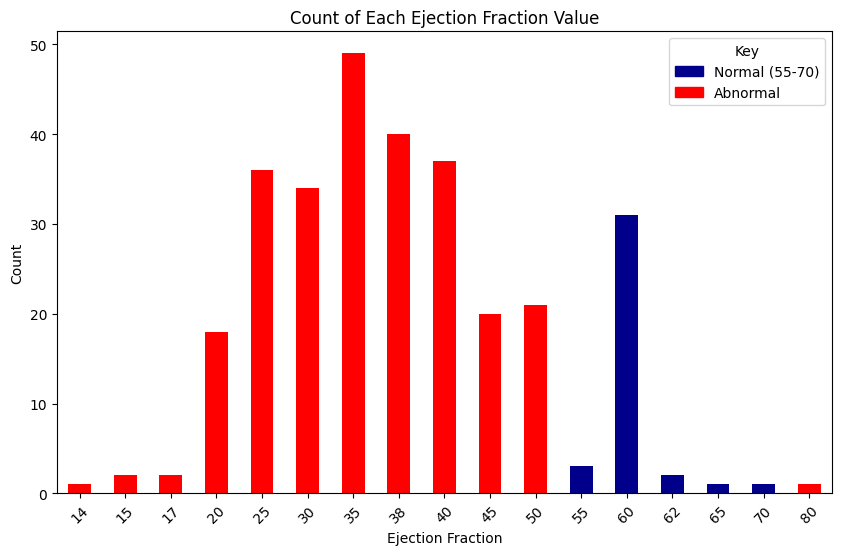

Ejection fraction (EF) is a measurement used to assess how well your heart is pumping blood.
 
It is expressed as a percentage and represents the proportion of blood that is ejected from the heart's left ventricle with each contraction.

Normal Range: A normal ejection fraction typically ranges from 55% to 70%. This means that 55% to 70% of the blood in the left ventricle is pumped out with each heartbeat.

Low Ejection Fraction:** An ejection fraction below 55% may indicate heart failure or cardiomyopathy. When the EF drops below 40%, it is often considered a marker of systolic heart failure.

The majority of these patients have ejection fractions of less than the normal range.


In [7]:
ejection_fraction_counts = heart_df['ejection_fraction'].value_counts()

# Sort the ejection fractions by value
ejection_fraction_counts = ejection_fraction_counts.sort_index()

# Define the color mapping
colors = ['darkblue' if 55 <= value <= 70 else 'red' for value in ejection_fraction_counts.index]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
ejection_fraction_counts.plot(kind='bar', color=colors)
normal_patch = mpatches.Patch(color='darkblue', label='Normal (55-70)')
abnormal_patch = mpatches.Patch(color='red', label='Abnormal')
plt.legend(handles=[normal_patch, abnormal_patch], title='Key')
plt.title('Count of Each Ejection Fraction Value')
plt.xlabel('Ejection Fraction')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

print("""Ejection fraction (EF) is a measurement used to assess how well your heart is pumping blood.\n 
It is expressed as a percentage and represents the proportion of blood that is ejected from the heart's left ventricle with each contraction.\n
Normal Range: A normal ejection fraction typically ranges from 55% to 70%. This means that 55% to 70% of the blood in the left ventricle is pumped out with each heartbeat.\n
Low Ejection Fraction:** An ejection fraction below 55% may indicate heart failure or cardiomyopathy. When the EF drops below 40%, it is often considered a marker of systolic heart failure.\n
The majority of these patients have ejection fractions of less than the normal range.""")


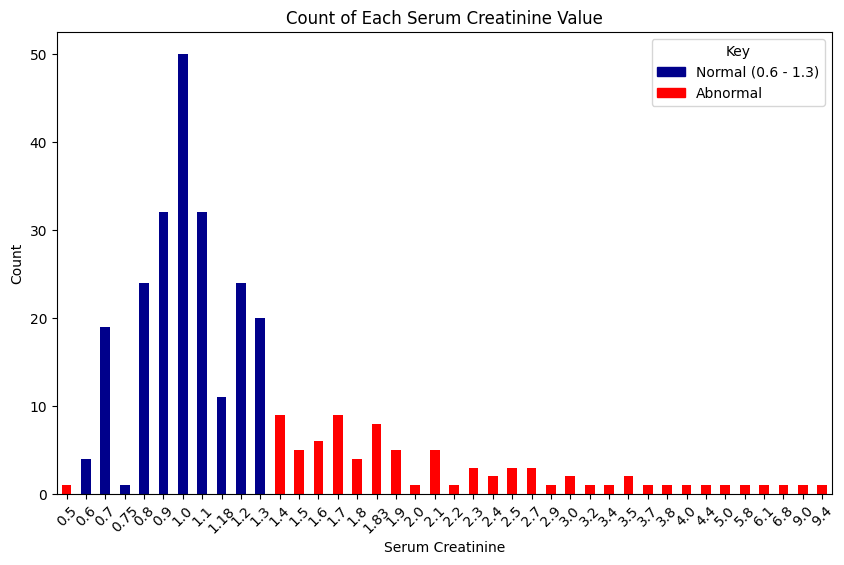

Serum creatinine is a blood test that measures the level of creatinine in your blood. 

Creatinine is a waste product produced by muscles from the breakdown of a compound called creatine. 
 
Normal Range: The normal range of serum creatinine varies slightly depending on age, sex, and muscle mass. 

Generally, for adult men, it is about 0.7 to 1.3 milligrams per deciliter (mg/dL), 

and for adult women, it is about 0.6 to 1.1 mg/dL.


In [8]:
serum_counts = heart_df['serum_creatinine'].value_counts()

# Sort the ejection fractions by value
serum_counts = serum_counts.sort_index()

# Define the color mapping
colors = ['darkblue' if 0.6 <= value <= 1.3 else 'red' for value in serum_counts.index]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
serum_counts.plot(kind='bar', color = colors)
normal_patch = mpatches.Patch(color='darkblue', label='Normal (0.6 - 1.3)')
abnormal_patch = mpatches.Patch(color='red', label='Abnormal')
plt.legend(handles=[normal_patch, abnormal_patch], title='Key')
plt.title('Count of Each Serum Creatinine Value')
plt.xlabel('Serum Creatinine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("""Serum creatinine is a blood test that measures the level of creatinine in your blood. \n
Creatinine is a waste product produced by muscles from the breakdown of a compound called creatine. \n 
Normal Range: The normal range of serum creatinine varies slightly depending on age, sex, and muscle mass. \n
Generally, for adult men, it is about 0.7 to 1.3 milligrams per deciliter (mg/dL), \n
and for adult women, it is about 0.6 to 1.1 mg/dL.""")

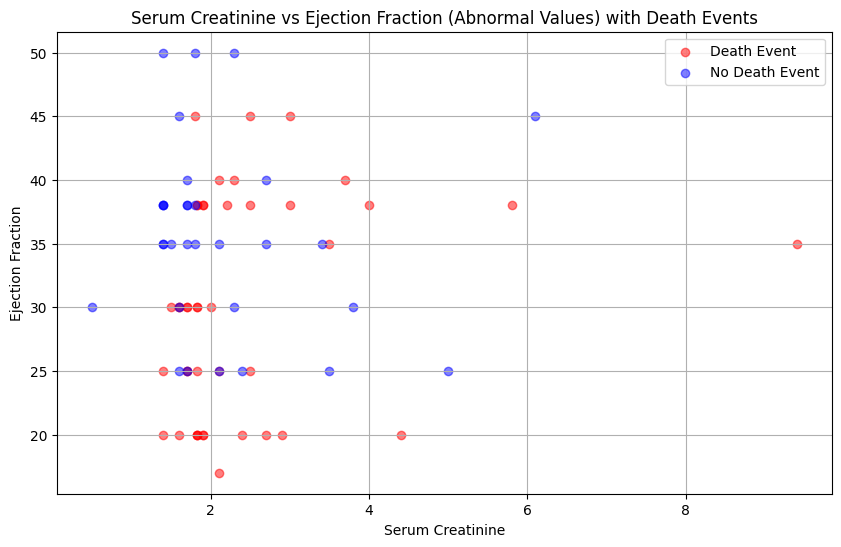

Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure 

      from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020)

From just the data it doesn't appear to be easy to visually see a pattern since there are deaths and no deaths in the same clusters


In [9]:
# Filter the DataFrame for abnormal Serum Creatinine and Ejection Fraction values
filtered_df_abnormal = heart_df[
    (~heart_df["serum_creatinine"].between(0.6, 1.3)) & 
    (~heart_df["ejection_fraction"].between(55, 70))
]

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for abnormal values that resulted in death
plt.scatter(filtered_df_abnormal[filtered_df_abnormal["DEATH_EVENT"] == 1]["serum_creatinine"],
            filtered_df_abnormal[filtered_df_abnormal["DEATH_EVENT"] == 1]["ejection_fraction"],
            c='red', label='Death Event', alpha=0.5)

# Scatter plot for abnormal values that did not result in death
plt.scatter(filtered_df_abnormal[filtered_df_abnormal["DEATH_EVENT"] == 0]["serum_creatinine"],
            filtered_df_abnormal[filtered_df_abnormal["DEATH_EVENT"] == 0]["ejection_fraction"],
            c='blue', label='No Death Event', alpha=0.5)

plt.title('Serum Creatinine vs Ejection Fraction (Abnormal Values) with Death Events')
plt.xlabel('Serum Creatinine')
plt.ylabel('Ejection Fraction')
plt.legend()
plt.grid(True)
plt.show()

print("""Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure \n
      from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020)\n
From just the data it doesn't appear to be easy to visually see a pattern since there are deaths and no deaths in the same clusters""")

In [10]:
# Smoking patients that encountered a death event
smoke_death = heart_df[(heart_df["smoking"] == 1) & (heart_df["DEATH_EVENT"]==1)]
num_smoke_deaths = len(smoke_death)
print(f"The number of smoking that had a death event: {num_smoke_deaths}")

The number of smoking that had a death event: 30


In [11]:
# Non-Smoking patients that encountered a death event
non_smoke_death = heart_df[(heart_df["smoking"] == 0) & (heart_df["DEATH_EVENT"]==1)]
num_non_smoke_death = len(non_smoke_death)
print(f"The number of smoking that had a death event: {num_non_smoke_death}")

The number of smoking that had a death event: 66


In [12]:
#Count total smoke and non-smoke
smoke_counts = heart_df["smoking"].value_counts().rename_axis('smoking').reset_index(name='total_somking_count')
#smoke_counts

#Count smoke and non-smoke with death events
smoke_event_counts = heart_df[heart_df["DEATH_EVENT"]==1]["smoking"].value_counts().rename_axis('smoking').reset_index(name='death_smoke_event_count')
# smoke_event_counts

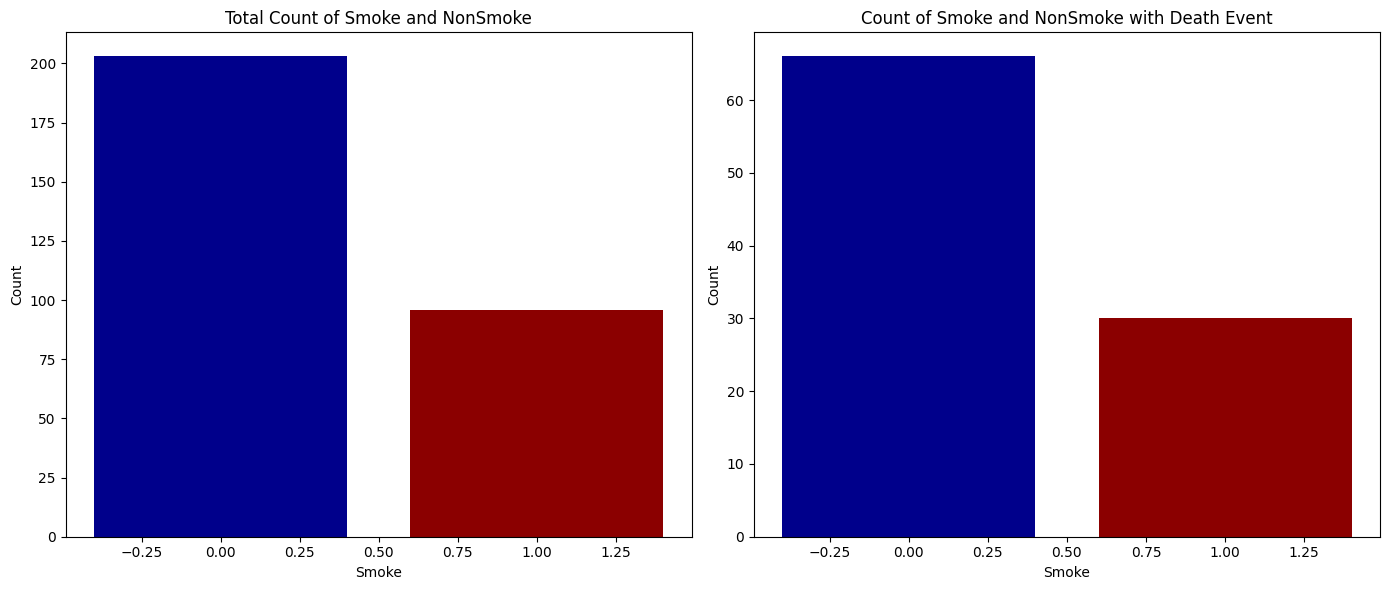

In [13]:
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
# Replace numeric sex values with labels
smoke_counts['sex'] = smoke_counts['smoking'].replace({1: 'Smoke', 0: 'NonSmoke'})
smoke_event_counts['sex'] = smoke_event_counts['smoking'].replace({1: 'Smoke', 0: 'NonSmoke'})

# Bar plot for total counts
axes[0].bar(smoke_counts['smoking'], smoke_counts['total_somking_count'], color=['darkblue', 'darkred'])
axes[0].set_title('Total Count of Smoke and NonSmoke')
axes[0].set_xlabel('Smoke')
axes[0].set_ylabel('Count')

# Bar plot for death event counts
axes[1].bar(smoke_event_counts['smoking'], smoke_event_counts['death_smoke_event_count'], color=['darkblue', 'darkred'])
axes[1].set_title('Count of Smoke and NonSmoke with Death Event')
axes[1].set_xlabel('Smoke')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [14]:
# Age group
age_bins = [0, 30, 40, 50 , 60, 70, 80, 90, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89', '90+']
heart_df['age_group'] = pd.cut(heart_df['age'], bins=age_bins, labels=age_labels, right=False)
heart_df.head()

# Smoking patients that encountered a death event by age group
smoke_death_age_group = heart_df[(heart_df["smoking"] == 1) & (heart_df["DEATH_EVENT"] == 1)].groupby('age_group', observed=False).size().reset_index(name='smoke_death_count')
smoke_death_age_group
# Non Smoking patients that encountered a death event by age group
non_smoke_death_age_group = heart_df[(heart_df["smoking"] == 1) & (heart_df["DEATH_EVENT"] == 0)].groupby('age_group', observed=False).size().reset_index(name='smoke_death_count')
non_smoke_death_age_group

#merge smoke and non-smoke age group
death_age_group = smoke_death_age_group.merge(non_smoke_death_age_group, on="age_group", how='outer')
death_age_group

,age_group,smoke_death_count_x,smoke_death_count_y
0,0-29,0,0
1,30-39,0,0
2,40-49,1,10
3,50-59,5,24
4,60-69,10,19
5,70-79,8,11
6,80-89,5,2
7,90+,1,0


In [15]:
# Patients with amaenia that encountered a death event
anaemia_death = heart_df[(heart_df['anaemia'] == 1) & (heart_df['DEATH_EVENT'] == 1)]
num_anaemia_deaths = len(anaemia_death)
print(f"The number of anaemic patients that had a death event: {num_anaemia_deaths}")

The number of anaemic patients that had a death event: 46


In [16]:
# Patients without anaemia that encountered a death event 
non_anaemia_death = heart_df[(heart_df['anaemia'] == 0) & (heart_df['DEATH_EVENT'] == 1)]
num_non_anaemia_deaths = len(non_anaemia_death)
print(f"The number of non-anaemic patients that had a death event: {num_non_anaemia_deaths}")

The number of non-anaemic patients that had a death event: 50


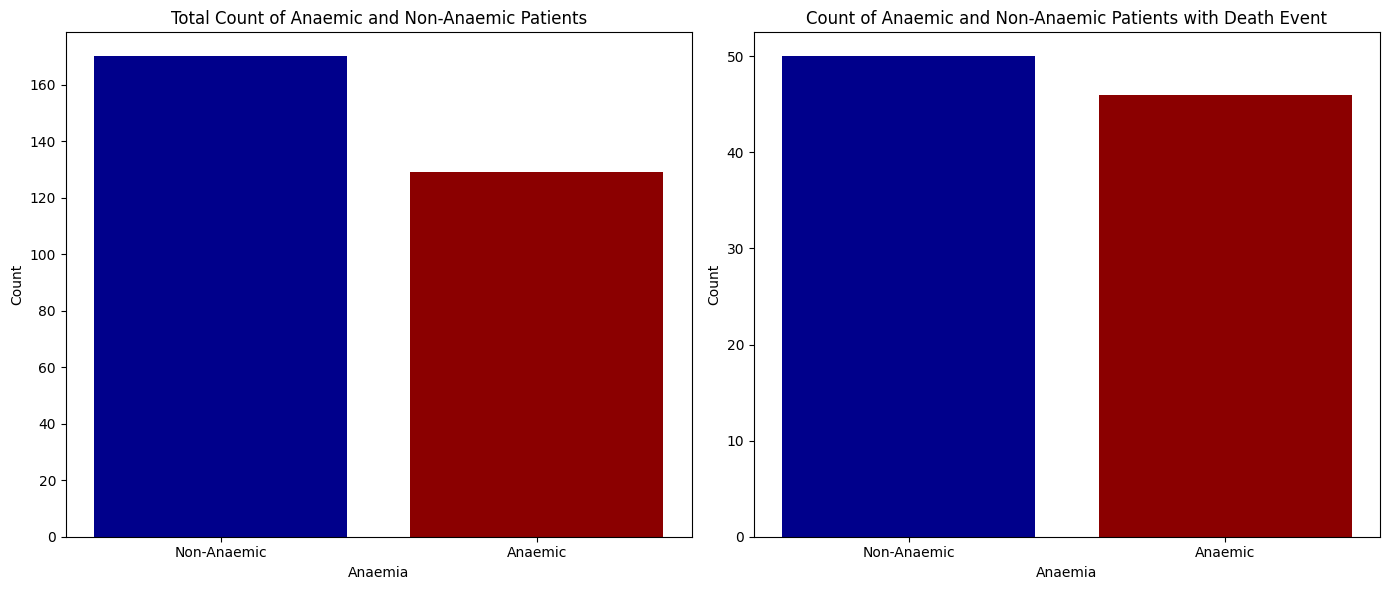

In [17]:
#Count total of amaemic/non anaemic patients
anaemia_counts = heart_df['anaemia'].value_counts().rename_axis('anaemia').reset_index(name='total_count')

#Count anaemic/non anaemic patients with death events
death_event_counts = heart_df[heart_df['DEATH_EVENT'] == 1]['anaemia'].value_counts().rename_axis('anaemia').reset_index(name='death_event_count')

# Replace numeric sex values with labels
anaemia_counts['anaemia'] = anaemia_counts['anaemia'].replace({1: 'Anaemic', 0: 'Non-Anaemic'})
death_event_counts['anaemia'] = death_event_counts['anaemia'].replace({1: 'Anaemic', 0: 'Non-Anaemic'})

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar plot for total counts
axes[0].bar(anaemia_counts['anaemia'], anaemia_counts['total_count'], color=['darkblue', 'darkred'])
axes[0].set_title('Total Count of Anaemic and Non-Anaemic Patients')
axes[0].set_xlabel('Anaemia')
axes[0].set_ylabel('Count')
# Bar plot for death event counts
axes[1].bar(death_event_counts['anaemia'], death_event_counts['death_event_count'], color=['darkblue', 'darkred'])
axes[1].set_title('Count of Anaemic and Non-Anaemic Patients with Death Event')
axes[1].set_xlabel('Anaemia')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [18]:
# diabetes patients that encountered a death event
diabetes_death = heart_df[(heart_df["diabetes"] == 1) & (heart_df["DEATH_EVENT"]==1)]
num_diabetes_deaths = len(diabetes_death)
print(f"The number of diabetes that had a death event: {num_diabetes_deaths}")

The number of diabetes that had a death event: 40


In [19]:
# Non-diabetes patients that encountered a death event
non_diabetes_death = heart_df[(heart_df["diabetes"] == 0) & (heart_df["DEATH_EVENT"]==1)]
num_non_diabetes_death = len(non_diabetes_death)
print(f"The number of diabetes that had a death event: {num_non_diabetes_death}")

The number of diabetes that had a death event: 56


In [20]:
#Count total diabetes and non-diabetes

total_patient_number = len(heart_df)

patient_counts = heart_df["diabetes"].value_counts().rename_axis('diabetes').reset_index(name='total count')
#diabetes_counts
print(f"number of diabetes and non diabetes:")
print(patient_counts)
print(f"total patient count is : {total_patient_number}")

number of diabetes and non diabetes:
   diabetes  total count
0         0          174
1         1          125
total patient count is : 299


In [21]:
#patient_counts

In [22]:
print()

In [23]:
#Count diabetes and non-diabetes with death events


diabetes_death_event_counts = heart_df[heart_df["DEATH_EVENT"]==1]["diabetes"].value_counts().rename_axis('diabetes').reset_index(name='death_count')
total_death_count = diabetes_death_event_counts['death_count'].sum()
# diabetes_event_counts
print("number of diabetes death and non-diabetes death:")
print(diabetes_death_event_counts)
print(f"total_death_count is:  {total_death_count}")

number of diabetes death and non-diabetes death:
   diabetes  death_count
0         0           56
1         1           40
total_death_count is:  96


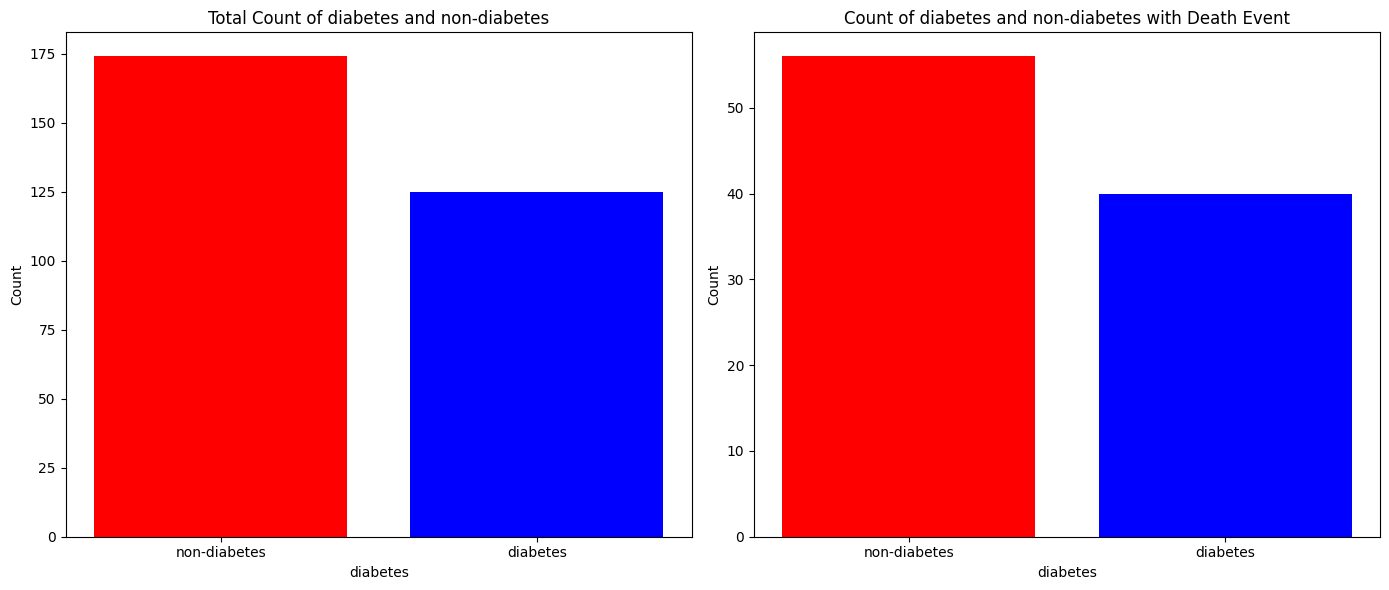

In [24]:
#Count total diabetes and non-diabetes
diabetes_counts = heart_df['diabetes'].value_counts().rename_axis('diabetes').reset_index(name='total_count')

#Count diabetes and non-diabetes with death events
death_event_counts = heart_df[heart_df['DEATH_EVENT'] == 1]['diabetes'].value_counts().rename_axis('diabetes').reset_index(name='death_event_count')

# Replace numeric diabetes values with labels
diabetes_counts['diabetes'] = diabetes_counts['diabetes'].replace({1: 'diabetes', 0: 'non-diabetes'})
death_event_counts['diabetes'] = death_event_counts['diabetes'].replace({1: 'diabetes', 0: 'non-diabetes'})

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar plot for total counts
axes[0].bar(diabetes_counts['diabetes'], diabetes_counts['total_count'], color=['red', 'blue'])
axes[0].set_title('Total Count of diabetes and non-diabetes')
axes[0].set_xlabel('diabetes')
axes[0].set_ylabel('Count')

# Bar plot for death event counts
axes[1].bar(death_event_counts['diabetes'], death_event_counts['death_event_count'], color=['red', 'blue'])
axes[1].set_title('Count of diabetes and non-diabetes with Death Event')
axes[1].set_xlabel('diabetes')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [25]:
# Age group
age_bins = [0, 30, 40, 50 , 60, 70, 80, 90, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89', '90+']
heart_df['age_group'] = pd.cut(heart_df['age'], bins=age_bins, labels=age_labels, right=False)
heart_df.head()

# diabetes patients that encountered a death event by age group
diabetes_death_age_group = heart_df[(heart_df["diabetes"] == 1) & (heart_df["DEATH_EVENT"] == 1)].groupby('age_group', observed=False).size().reset_index(name='diabetes_death_count')
diabetes_death_age_group
# Non diabetes patients that encountered a death event by age group
non_diabetes_death_age_group = heart_df[(heart_df["diabetes"] == 0) & (heart_df["DEATH_EVENT"] == 1)].groupby('age_group', observed=False).size().reset_index(name='non_diabetes_death_count')
non_diabetes_death_age_group

#merge diabetes and non-diabetes age group
death_age_group = diabetes_death_age_group.merge(non_diabetes_death_age_group, on="age_group", how='outer')
death_age_group

,age_group,diabetes_death_count,non_diabetes_death_count
0,0-29,0,0
1,30-39,0,0
2,40-49,6,5
3,50-59,7,13
4,60-69,16,11
5,70-79,5,15
6,80-89,4,9
7,90+,2,3


In [26]:
#To visualize the comparison of mortality rates between diabetic and non-diabetic populations across different age groups.

/var/folders/hd/p5_45krj19z5mg2jsb55zjcr0000gn/T/ipykernel_5206/2922394563.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_population_age_group = heart_df.groupby('age_group').size().reset_index(name='total_population')


<Figure size 1000x600 with 0 Axes>

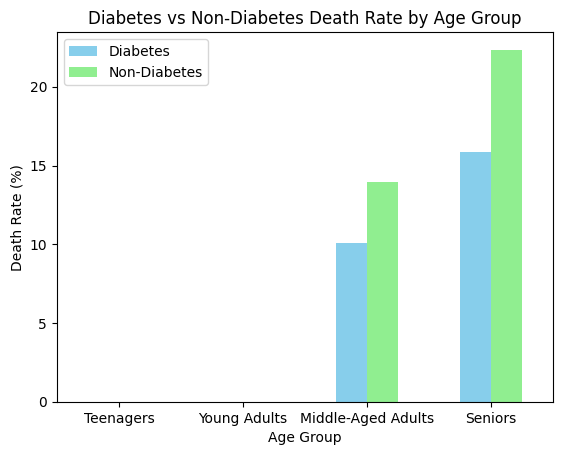

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define age groups and labels.
age_bins = [0, 18, 36, 60, 100]
# 
age_labels = ['Teenagers', 'Young Adults', 'Middle-Aged Adults', 'Seniors']

# Divide age groups according to age ranges.
heart_df['age_group'] = pd.cut(heart_df['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the total number of people in each age group.
total_population_age_group = heart_df.groupby('age_group').size().reset_index(name='total_population')

# Calculate the number of deaths among diabetic patients, categorized by age group.
diabetes_death_age_group = heart_df[(heart_df["diabetes"] == 1) & (heart_df["DEATH_EVENT"] == 1)].groupby('age_group', observed=False).size().reset_index(name='diabetes_death_count')

# Calculate the number of deaths among non-diabetic patients, categorized by age group.
non_diabetes_death_age_group = heart_df[(heart_df["diabetes"] == 0) & (heart_df["DEATH_EVENT"] == 1)].groupby('age_group', observed=False).size().reset_index(name='non_diabetes_death_count')

# Combine the age group statistics for diabetic and non-diabetic patients with the total population statistics.
death_age_group = diabetes_death_age_group.merge(non_diabetes_death_age_group, on="age_group", how='outer')
death_age_group = death_age_group.merge(total_population_age_group, on="age_group", how='outer')

# Calculate the mortality rate.
death_age_group['diabetes_death_rate'] = death_age_group['diabetes_death_count'] / death_age_group['total_population'] * 100
death_age_group['non_diabetes_death_rate'] = death_age_group['non_diabetes_death_count'] / death_age_group['total_population'] * 100

# Create a bar chart
plt.figure(figsize=(10, 6))

# Create a bar chart.
death_age_group.plot(kind='bar', x='age_group', y=['diabetes_death_rate', 'non_diabetes_death_rate'], 
                          color=['skyblue', 'lightgreen'])

# Set the title and labels
plt.title('Diabetes vs Non-Diabetes Death Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Death Rate (%)')
plt.xticks(rotation=0)

# Add a legend
plt.legend(['Diabetes', 'Non-Diabetes'])
plt.show()

In [28]:
# The proportion of combinations of whether or not someone has diabetes and whether or not they died.

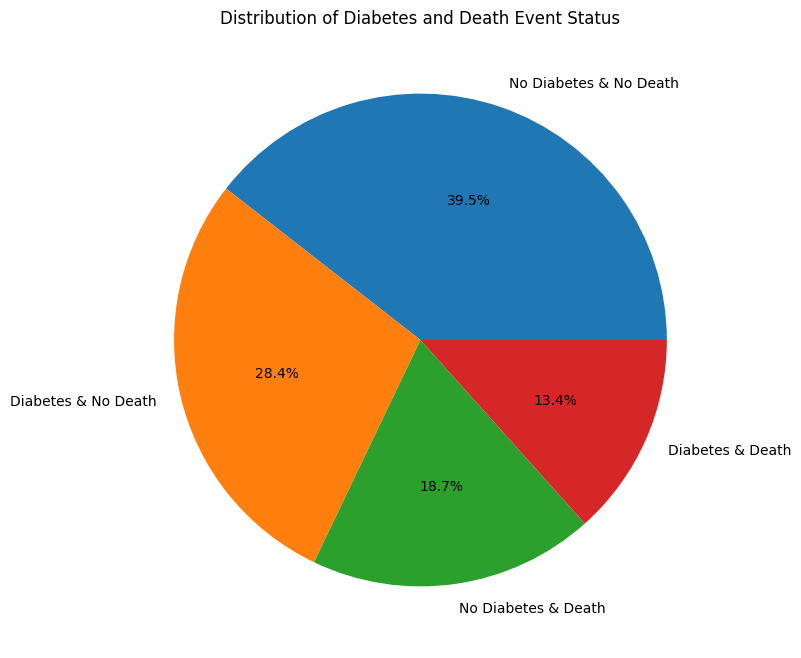

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new column based on the combination of diabetes status and death events
heart_df['category'] = heart_df.apply(lambda row: 
                                      'Diabetes & Death' if row['diabetes'] == 1 and row['DEATH_EVENT'] == 1 else
                                      ('Diabetes & No Death' if row['diabetes'] == 1 and row['DEATH_EVENT'] == 0 else
                                       ('No Diabetes & Death' if row['diabetes'] == 0 and row['DEATH_EVENT'] == 1 else
                                        'No Diabetes & No Death')), axis=1)

# Calculate the distribution of each category
category_distribution = heart_df['category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%')

plt.title('Distribution of Diabetes and Death Event Status')
plt.show()


In [30]:
# A distribution chart of ejection fraction for diabetic and non-diabetic patients.

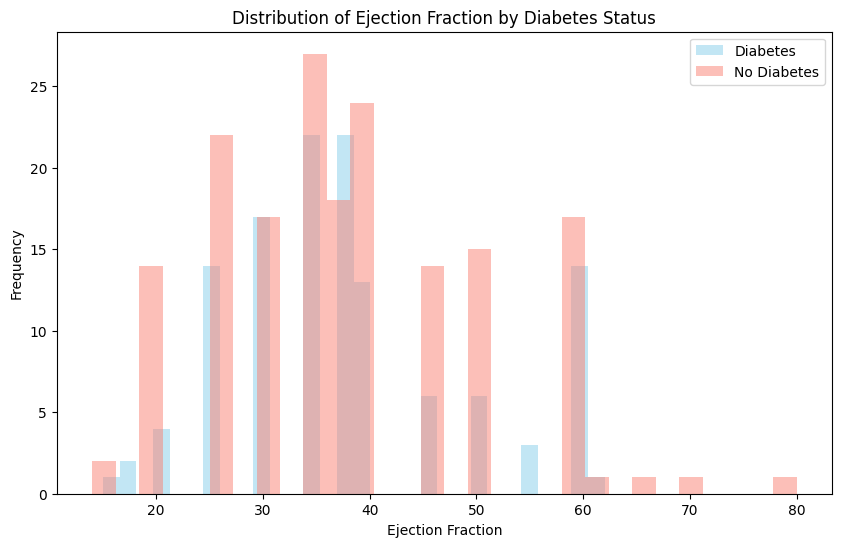

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the figure size.
plt.figure(figsize=(10, 6))

# Filter the data for diabetic and non-diabetic patients
diabetes_data = heart_df[heart_df['diabetes'] == 1]['ejection_fraction']
non_diabetes_data = heart_df[heart_df['diabetes'] == 0]['ejection_fraction']

# Create a histogram
plt.hist(diabetes_data, bins=30, alpha=0.5, label='Diabetes', color='skyblue')
plt.hist(non_diabetes_data, bins=30, alpha=0.5, label='No Diabetes', color='salmon')

# Set the title and labels
plt.title('Distribution of Ejection Fraction by Diabetes Status')
plt.xlabel('Ejection Fraction')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Age group
age_bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
heart_df['age_group'] = pd.cut(heart_df['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the number of death events under each combination of conditions
death_age_group = heart_df[heart_df["DEATH_EVENT"] == 1].groupby(
    ['age_group', 'diabetes', 'high_blood_pressure'], observed=False
).size().reset_index(name='death_count')


# Create a pivot table
pivot_df = death_age_group.pivot_table(
    index='age_group',
    columns=['diabetes', 'high_blood_pressure'],
    values='death_count',
    fill_value=0
)

# Rearrange the columns
pivot_df.columns = [f'Diabetes={d}_HP={hp}' for d, hp in pivot_df.columns]
pivot_df.reset_index(inplace=True)

pivot_df

/var/folders/hd/p5_45krj19z5mg2jsb55zjcr0000gn/T/ipykernel_5206/2934026396.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = death_age_group.pivot_table(


,age_group,Diabetes=0_HP=0,Diabetes=0_HP=1,Diabetes=1_HP=0,Diabetes=1_HP=1
0,0-29,0.0,0.0,0.0,0.0
1,30-39,0.0,0.0,0.0,0.0
2,40-49,3.0,2.0,3.0,3.0
3,50-59,8.0,5.0,4.0,3.0
4,60-69,8.0,3.0,13.0,3.0
5,70-79,7.0,8.0,0.0,5.0
6,80-89,7.0,2.0,2.0,2.0
7,90+,1.0,2.0,1.0,1.0
